### Fitxer de prova

In [4]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset principal de solicitudes de adelanto en efectivo
cash_request = pd.read_csv('./data/extract - cash request - data analyst.csv')

# Inspeccionar la estructura y el tipo de datos de 'cash_request'
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [13]:
# Crear una copia del DataFrame para preservar el original
cr = cash_request.copy()
# Filtrar columnas relevantes para el análisis
cr = cr[["amount", "created_at", "user_id", "deleted_account_id","transfer_type"]]
cr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              23970 non-null  float64
 1   created_at          23970 non-null  object 
 2   user_id             21867 non-null  float64
 3   deleted_account_id  2104 non-null   float64
 4   transfer_type       23970 non-null  object 
dtypes: float64(3), object(2)
memory usage: 936.5+ KB


In [14]:
# Convertir 'created_at' a tipo datetime para manipulación de fechas
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()


amount                       created_at  user_id  deleted_account_id  \
0   100.0 2019-12-10 19:05:21.596873+00:00    804.0                 NaN   
1   100.0 2019-12-10 19:50:12.347780+00:00    231.0                 NaN   
2   100.0 2019-12-10 19:13:35.825460+00:00    191.0                 NaN   
3    99.0 2019-12-10 19:16:10.880172+00:00    761.0                 NaN   
4   100.0 2020-05-06 09:59:38.877376+00:00   7686.0                 NaN   

  transfer_type  
0       regular  
1       regular  
2       regular  
3       regular  
4       regular

In [15]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
cr['created_at_notz'] = cr['created_at'].dt.tz_localize(None)
cr.head()

amount                       created_at  user_id  deleted_account_id  \
0   100.0 2019-12-10 19:05:21.596873+00:00    804.0                 NaN   
1   100.0 2019-12-10 19:50:12.347780+00:00    231.0                 NaN   
2   100.0 2019-12-10 19:13:35.825460+00:00    191.0                 NaN   
3    99.0 2019-12-10 19:16:10.880172+00:00    761.0                 NaN   
4   100.0 2020-05-06 09:59:38.877376+00:00   7686.0                 NaN   

  transfer_type            created_at_notz  
0       regular 2019-12-10 19:05:21.596873  
1       regular 2019-12-10 19:50:12.347780  
2       regular 2019-12-10 19:13:35.825460  
3       regular 2019-12-10 19:16:10.880172  
4       regular 2020-05-06 09:59:38.877376

In [16]:
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()


/tmp/ipykernel_119590/3236555966.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


amount                       created_at  user_id  deleted_account_id  \
0   100.0 2019-12-10 19:05:21.596873+00:00    804.0                 NaN   
1   100.0 2019-12-10 19:50:12.347780+00:00    231.0                 NaN   
2   100.0 2019-12-10 19:13:35.825460+00:00    191.0                 NaN   
3    99.0 2019-12-10 19:16:10.880172+00:00    761.0                 NaN   
4   100.0 2020-05-06 09:59:38.877376+00:00   7686.0                 NaN   

  transfer_type            created_at_notz      Mes  
0       regular 2019-12-10 19:05:21.596873  2019-12  
1       regular 2019-12-10 19:50:12.347780  2019-12  
2       regular 2019-12-10 19:13:35.825460  2019-12  
3       regular 2019-12-10 19:16:10.880172  2019-12  
4       regular 2020-05-06 09:59:38.877376  2020-05

In [18]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at_notz'].transform('min').dt.to_period('M')
cr.head(10)

amount                       created_at  user_id  deleted_account_id  \
0   100.0 2019-12-10 19:05:21.596873+00:00    804.0                 NaN   
1   100.0 2019-12-10 19:50:12.347780+00:00    231.0                 NaN   
2   100.0 2019-12-10 19:13:35.825460+00:00    191.0                 NaN   
3    99.0 2019-12-10 19:16:10.880172+00:00    761.0                 NaN   
4   100.0 2020-05-06 09:59:38.877376+00:00   7686.0                 NaN   
5   100.0 2020-05-23 20:58:55.129432+00:00   9489.0                 NaN   
6   100.0 2020-06-16 17:07:38.452652+00:00  14631.0                 NaN   
7   100.0 2020-02-10 01:11:53.808270+00:00      NaN               309.0   
8   100.0 2020-06-28 12:06:33.712840+00:00      NaN              2499.0   
9    90.0 2019-12-10 19:51:23.911206+00:00    897.0                 NaN   

  transfer_type            created_at_notz      Mes  Cohorte  
0       regular 2019-12-10 19:05:21.596873  2019-12  2019-12  
1       regular 2019-12-10 19:50:12.347780  2019-12  2019-12  
2       regular 2019-12-10 19:13:35.825460  2019-12  2019-12  
3       regular 2019-12-10 19:16:10.880172  2019-12  2019-12  
4       regular 2020-05-06 09:59:38.877376  2020-05  2020-05  
5       regular 2020-05-23 20:58:55.129432  2020-05  2020-05  
6       regular 2020-06-16 17:07:38.452652  2020-06  2020-06  
7       regular 2020-02-10 01:11:53.808270  2020-02      NaT  
8       regular 2020-06-28 12:06:33.712840  2020-06      NaT  
9       regular 2019-12-10 19:51:23.911206  2019-12  2019-12

In [19]:
# Calcular el número inicial de clientes únicos en cada cohorte
cohort_sizes_initial = cr.groupby('Cohorte').agg(Num_Clientes_Iniciales=('user_id', 'nunique')).reset_index()
cohort_sizes_initial


Cohorte  Num_Clientes_Iniciales
0   2019-11                       1
1   2019-12                     204
2   2020-01                      90
3   2020-02                      84
4   2020-03                      69
5   2020-04                     212
6   2020-05                     369
7   2020-06                    1338
8   2020-07                    1294
9   2020-08                     656
10  2020-09                    1712
11  2020-10                    4694
12  2020-11                      75

In [21]:
# Calcular la cantidad de clientes únicos en cada cohorte para cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

Cohorte      Mes  Num_Clientes
0   2019-11  2019-11             1
1   2019-11  2019-12             1
2   2019-11  2020-04             1
3   2019-11  2020-05             1
4   2019-11  2020-08             1
..      ...      ...           ...
78  2020-09  2020-10           660
79  2020-09  2020-11            20
80  2020-10  2020-10          4694
81  2020-10  2020-11            15
82  2020-11  2020-11            75

[83 rows x 3 columns]

In [22]:
# Calcular la cantidad de solicitudes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_cash_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly

Cohorte      Mes  Num_Solicitudes
0   2019-11  2019-11                1
1   2019-11  2019-12                1
2   2019-11  2020-04                1
3   2019-11  2020-05                1
4   2019-11  2020-08                1
..      ...      ...              ...
78  2020-09  2020-10              707
79  2020-09  2020-11               20
80  2020-10  2020-10             4928
81  2020-10  2020-11               15
82  2020-11  2020-11               75

[83 rows x 3 columns]

In [23]:
# Calcular la tasa de retención de clientes (clientes únicos por cohorte en cada mes / clientes iniciales de la cohorte)
retention_clientes = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes')
retention_clientes = retention_clientes.div(cohort_sizes_initial.set_index('Cohorte')['Num_Clientes_Iniciales'], axis=0)
retention_clientes

Mes      2019-11  2019-12   2020-01   2020-02   2020-03   2020-04   2020-05  \
Cohorte                                                                       
2019-11      1.0      1.0       NaN       NaN       NaN  1.000000  1.000000   
2019-12      NaN      1.0  0.338235  0.215686  0.274510  0.259804  0.323529   
2020-01      NaN      NaN  1.000000  0.211111  0.155556  0.300000  0.255556   
2020-02      NaN      NaN       NaN  1.000000  0.523810  0.488095  0.488095   
2020-03      NaN      NaN       NaN       NaN  1.000000  0.507246  0.463768   
2020-04      NaN      NaN       NaN       NaN       NaN  1.000000  0.490566   
2020-05      NaN      NaN       NaN       NaN       NaN       NaN  1.000000   
2020-06      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-07      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-08      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-09      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-10      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-11      NaN      NaN       NaN       NaN       NaN       NaN       NaN   

Mes       2020-06   2020-07   2020-08   2020-09   2020-10   2020-11  
Cohorte                                                              
2019-11       NaN       NaN  1.000000  1.000000  1.000000       NaN  
2019-12  0.289216  0.254902  0.308824  0.205882  0.289216  0.004902  
2020-01  0.266667  0.300000  0.233333  0.222222  0.255556  0.011111  
2020-02  0.452381  0.428571  0.428571  0.297619  0.416667       NaN  
2020-03  0.594203  0.434783  0.405797  0.376812  0.391304  0.014493  
2020-04  0.509434  0.396226  0.358491  0.311321  0.278302       NaN  
2020-05  0.615176  0.536585  0.452575  0.346883  0.401084  0.008130  
2020-06  1.000000  0.520927  0.515695  0.403587  0.405082  0.002990  
2020-07       NaN  1.000000  0.499227  0.374034  0.394900  0.005410  
2020-08       NaN       NaN  1.000000  0.425305  0.371951  0.015244  
2020-09       NaN       NaN       NaN  1.000000  0.385514  0.011682  
2020-10       NaN       NaN       NaN       NaN  1.000000  0.003196  
2020-11       NaN       NaN       NaN       NaN       NaN  1.000000

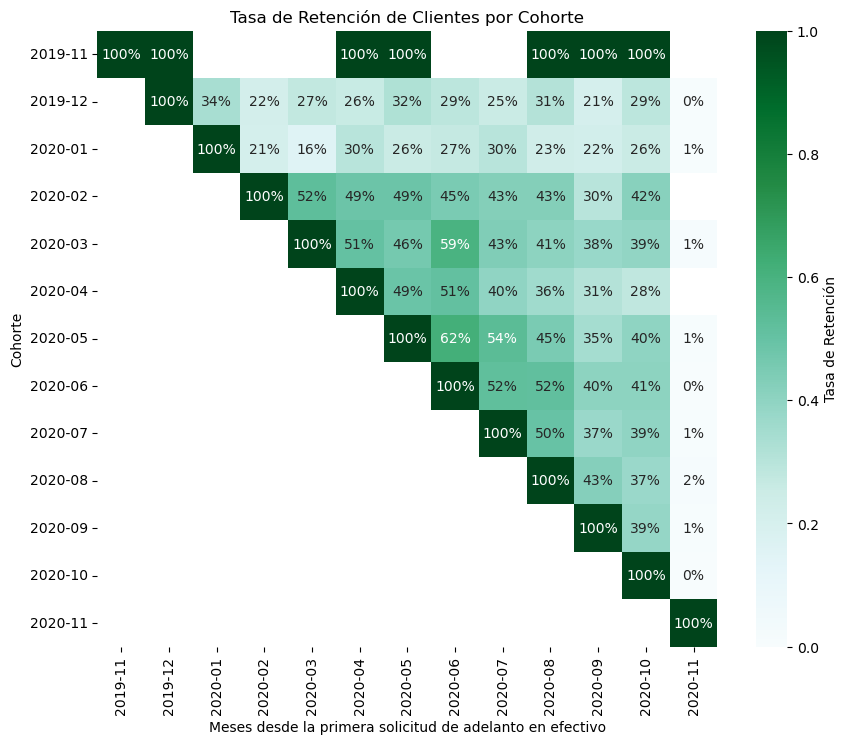

6

In [ ]:
# Visualizar la tasa de retención de clientes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Clientes por Cohorte')
sns.heatmap(data=retention_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()


In [26]:
# Calcular la tasa de abandono de clientes (1 - tasa de retención)
churn_clientes = 1 - retention_clientes


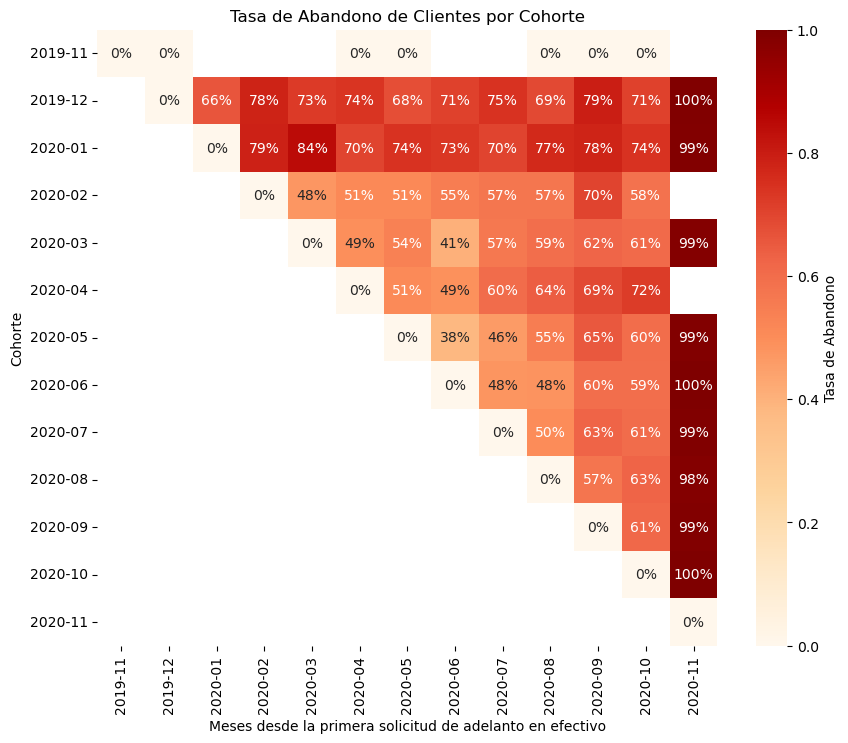

In [ ]:

plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Clientes por Cohorte')
sns.heatmap(data=churn_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='OrRd', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()


In [29]:
# Calcular el número inicial de solicitudes de adelanto de efectivo en cada cohorte
cohort_cash_initial = cohort_cash_monthly.groupby('Cohorte').first().reset_index().rename(columns={'Num_Solicitudes':'Num_Solicitudes_Iniciales'})
cohort_cash_initial


Cohorte      Mes  Num_Solicitudes_Iniciales
0   2019-11  2019-11                          1
1   2019-12  2019-12                        229
2   2020-01  2020-01                        101
3   2020-02  2020-02                         90
4   2020-03  2020-03                         78
5   2020-04  2020-04                        229
6   2020-05  2020-05                        409
7   2020-06  2020-06                       1658
8   2020-07  2020-07                       1736
9   2020-08  2020-08                        894
10  2020-09  2020-09                       1909
11  2020-10  2020-10                       4928
12  2020-11  2020-11                         75

In [30]:
# Calcular la tasa de retención de solicitudes (solicitudes por cohorte en cada mes / solicitudes iniciales de la cohorte)
retention_cash = cohort_cash_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Solicitudes')
retention_cash = retention_cash.div(cohort_cash_initial.set_index('Cohorte')['Num_Solicitudes_Iniciales'], axis=0)
retention_cash

Mes      2019-11  2019-12   2020-01   2020-02   2020-03   2020-04   2020-05  \
Cohorte                                                                       
2019-11      1.0      1.0       NaN       NaN       NaN  1.000000  1.000000   
2019-12      NaN      1.0  0.327511  0.200873  0.288210  0.288210  0.323144   
2020-01      NaN      NaN  1.000000  0.207921  0.148515  0.346535  0.267327   
2020-02      NaN      NaN       NaN  1.000000  0.533333  0.533333  0.488889   
2020-03      NaN      NaN       NaN       NaN  1.000000  0.500000  0.525641   
2020-04      NaN      NaN       NaN       NaN       NaN  1.000000  0.572052   
2020-05      NaN      NaN       NaN       NaN       NaN       NaN  1.000000   
2020-06      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-07      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-08      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-09      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-10      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-11      NaN      NaN       NaN       NaN       NaN       NaN       NaN   

Mes       2020-06   2020-07   2020-08   2020-09   2020-10   2020-11  
Cohorte                                                              
2019-11       NaN       NaN  1.000000  1.000000  2.000000       NaN  
2019-12  0.331878  0.275109  0.331878  0.218341  0.310044  0.004367  
2020-01  0.247525  0.277228  0.217822  0.217822  0.237624  0.009901  
2020-02  0.466667  0.411111  0.500000  0.300000  0.466667       NaN  
2020-03  0.551282  0.435897  0.384615  0.346154  0.384615  0.012821  
2020-04  0.580786  0.423581  0.432314  0.340611  0.318777       NaN  
2020-05  0.669927  0.581907  0.498778  0.381418  0.403423  0.007335  
2020-06  1.000000  0.558504  0.520507  0.384801  0.375151  0.002413  
2020-07       NaN  1.000000  0.493088  0.326037  0.328341  0.004032  
2020-08       NaN       NaN  1.000000  0.366890  0.310962  0.011186  
2020-09       NaN       NaN       NaN  1.000000  0.370351  0.010477  
2020-10       NaN       NaN       NaN       NaN  1.000000  0.003044  
2020-11       NaN       NaN       NaN       NaN       NaN  1.000000

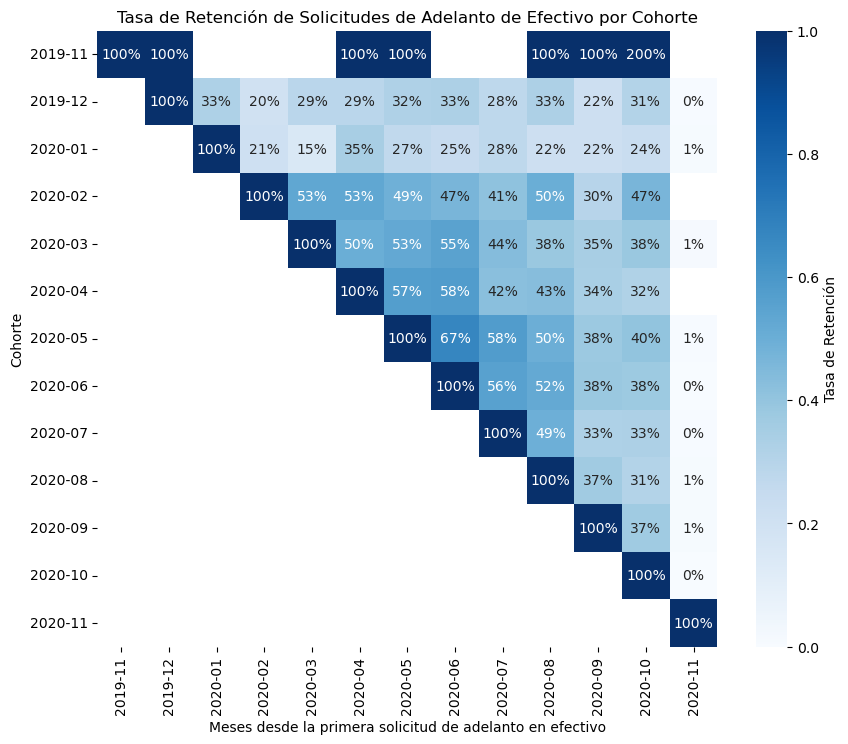

In [31]:
# Visualizar la tasa de retención de solicitudes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Solicitudes de Adelanto de Efectivo por Cohorte')
sns.heatmap(data=retention_cash, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='Blues', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [32]:
# Calcular la tasa de abandono de solicitudes (1 - tasa de retención de solicitudes)
churn_cash = 1 - retention_cash
churn_cash

Mes      2019-11  2019-12   2020-01   2020-02   2020-03   2020-04   2020-05  \
Cohorte                                                                       
2019-11      0.0      0.0       NaN       NaN       NaN  0.000000  0.000000   
2019-12      NaN      0.0  0.672489  0.799127  0.711790  0.711790  0.676856   
2020-01      NaN      NaN  0.000000  0.792079  0.851485  0.653465  0.732673   
2020-02      NaN      NaN       NaN  0.000000  0.466667  0.466667  0.511111   
2020-03      NaN      NaN       NaN       NaN  0.000000  0.500000  0.474359   
2020-04      NaN      NaN       NaN       NaN       NaN  0.000000  0.427948   
2020-05      NaN      NaN       NaN       NaN       NaN       NaN  0.000000   
2020-06      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-07      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-08      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-09      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-10      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2020-11      NaN      NaN       NaN       NaN       NaN       NaN       NaN   

Mes       2020-06   2020-07   2020-08   2020-09   2020-10   2020-11  
Cohorte                                                              
2019-11       NaN       NaN  0.000000  0.000000 -1.000000       NaN  
2019-12  0.668122  0.724891  0.668122  0.781659  0.689956  0.995633  
2020-01  0.752475  0.722772  0.782178  0.782178  0.762376  0.990099  
2020-02  0.533333  0.588889  0.500000  0.700000  0.533333       NaN  
2020-03  0.448718  0.564103  0.615385  0.653846  0.615385  0.987179  
2020-04  0.419214  0.576419  0.567686  0.659389  0.681223       NaN  
2020-05  0.330073  0.418093  0.501222  0.618582  0.596577  0.992665  
2020-06  0.000000  0.441496  0.479493  0.615199  0.624849  0.997587  
2020-07       NaN  0.000000  0.506912  0.673963  0.671659  0.995968  
2020-08       NaN       NaN  0.000000  0.633110  0.689038  0.988814  
2020-09       NaN       NaN       NaN  0.000000  0.629649  0.989523  
2020-10       NaN       NaN       NaN       NaN  0.000000  0.996956  
2020-11       NaN       NaN       NaN       NaN       NaN  0.000000

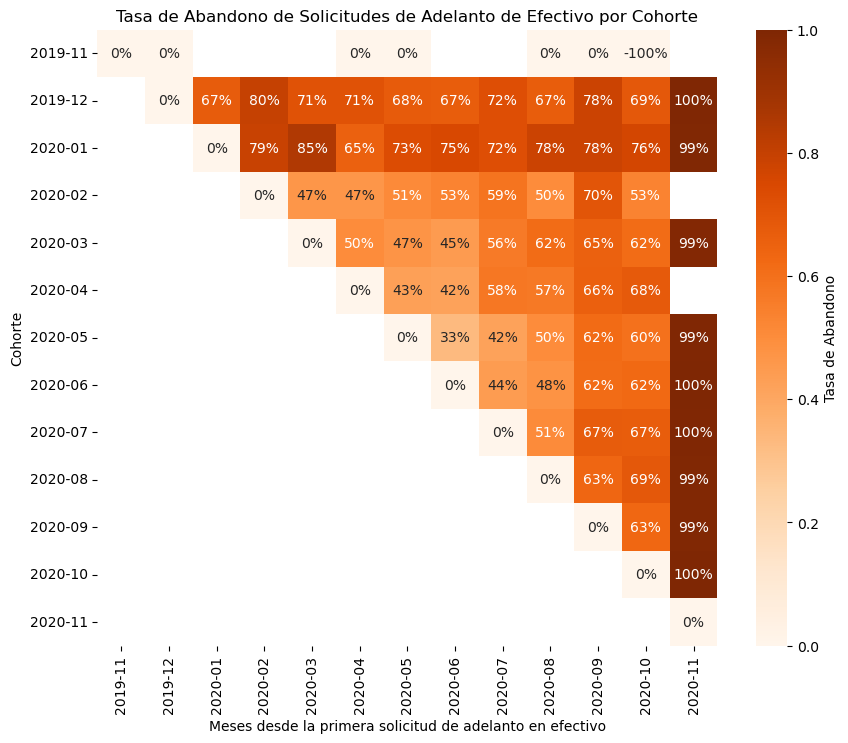

In [33]:
# Visualizar la tasa de abandono de solicitudes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Solicitudes de Adelanto de Efectivo por Cohorte')
sns.heatmap(data=churn_cash, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='Oranges', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [35]:
# Cargar el dataset de tarifas o fees para análisis de cohortes de tarifas
fees = pd.read_csv('./data/extract - fees - data analyst - .csv')
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [36]:
# Crear una copia del DataFrame para preservar el original
fs = fees.copy()
fs = fs[["cash_request_id", "total_amount", "created_at"]]
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21057 non-null  float64
 1   total_amount     21061 non-null  float64
 2   created_at       21061 non-null  object 
dtypes: float64(2), object(1)
memory usage: 493.7+ KB


In [38]:
# Convertir la columna 'created_at' en fees a tipo datetime para análisis temporal
fs['created_at'] = pd.to_datetime(fs['created_at'])
fs.head()

cash_request_id  total_amount                       created_at
0          14941.0           5.0 2020-09-07 10:47:27.423150+00:00
1          11714.0           5.0 2020-09-09 20:51:17.998653+00:00
2          23371.0           5.0 2020-10-23 10:10:58.352972+00:00
3          26772.0           5.0 2020-10-31 15:46:53.643958+00:00
4          19350.0           5.0 2020-10-06 08:20:17.170432+00:00

In [39]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
fs['created_at'] = fs['created_at'].dt.tz_localize(None)
fs.head()

cash_request_id  total_amount                 created_at
0          14941.0           5.0 2020-09-07 10:47:27.423150
1          11714.0           5.0 2020-09-09 20:51:17.998653
2          23371.0           5.0 2020-10-23 10:10:58.352972
3          26772.0           5.0 2020-10-31 15:46:53.643958
4          19350.0           5.0 2020-10-06 08:20:17.170432

In [40]:
# Crear columna 'Mes' indicando el mes de cada solicitud
fs['Mes'] = fs['created_at'].dt.to_period('M')
fs.head()

cash_request_id  total_amount                 created_at      Mes
0          14941.0           5.0 2020-09-07 10:47:27.423150  2020-09
1          11714.0           5.0 2020-09-09 20:51:17.998653  2020-09
2          23371.0           5.0 2020-10-23 10:10:58.352972  2020-10
3          26772.0           5.0 2020-10-31 15:46:53.643958  2020-10
4          19350.0           5.0 2020-10-06 08:20:17.170432  2020-10

In [41]:
# Crear columna 'Cohorte' que indica el mes del primer cargo de cada cliente
fs['Cohorte'] = fs.groupby('cash_request_id')['created_at'].transform('min').dt.to_period('M')
fs.head()

cash_request_id  total_amount                 created_at      Mes  Cohorte
0          14941.0           5.0 2020-09-07 10:47:27.423150  2020-09  2020-09
1          11714.0           5.0 2020-09-09 20:51:17.998653  2020-09  2020-08
2          23371.0           5.0 2020-10-23 10:10:58.352972  2020-10  2020-10
3          26772.0           5.0 2020-10-31 15:46:53.643958  2020-10  2020-10
4          19350.0           5.0 2020-10-06 08:20:17.170432  2020-10  2020-10

In [42]:
# Calcular la cantidad de tarifas iniciales por cohorte
cohort_fees_initial = fs.groupby('Cohorte').agg(Num_Tarifas_Iniciales=('cash_request_id', 'nunique')).reset_index()
cohort_fees_initial

Cohorte  Num_Tarifas_Iniciales
0  2020-05                     14
1  2020-06                    447
2  2020-07                    856
3  2020-08                   1922
4  2020-09                   2640
5  2020-10                   6930
6  2020-11                    124

In [43]:
# Calcular el número de tarifas en cada cohorte para cada mes
cohort_fees_monthly = fs.groupby(['Cohorte', 'Mes']).agg(Num_Tarifas=('cash_request_id', 'nunique')).reset_index()
cohort_fees_monthly

Cohorte      Mes  Num_Tarifas
0   2020-05  2020-05           14
1   2020-05  2020-06            5
2   2020-05  2020-07            2
3   2020-05  2020-08            1
4   2020-05  2020-09            1
5   2020-05  2020-10            1
6   2020-06  2020-06          447
7   2020-06  2020-07          196
8   2020-06  2020-08           74
9   2020-06  2020-09           42
10  2020-06  2020-10           37
11  2020-07  2020-07          856
12  2020-07  2020-08          318
13  2020-07  2020-09          172
14  2020-07  2020-10          123
15  2020-08  2020-08         1922
16  2020-08  2020-09          685
17  2020-08  2020-10          379
18  2020-09  2020-09         2640
19  2020-09  2020-10          953
20  2020-09  2020-11           17
21  2020-10  2020-10         6930
22  2020-10  2020-11           99
23  2020-11  2020-11          124

In [44]:
# Calcular la tasa de retención de tarifas (número de tarifas de cada cohorte en cada mes / tarifas iniciales de la cohorte)
retention_fees = cohort_fees_monthly.pivot(index='Cohorte', columns='Mes',values='Num_Tarifas')
retention_fees = retention_fees.div(cohort_fees_initial.set_index('Cohorte')['Num_Tarifas_Iniciales'], axis=0)
retention_fees

Mes      2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11
Cohorte                                                                     
2020-05      1.0  0.357143  0.142857  0.071429  0.071429  0.071429       NaN
2020-06      NaN  1.000000  0.438479  0.165548  0.093960  0.082774       NaN
2020-07      NaN       NaN  1.000000  0.371495  0.200935  0.143692       NaN
2020-08      NaN       NaN       NaN  1.000000  0.356400  0.197190       NaN
2020-09      NaN       NaN       NaN       NaN  1.000000  0.360985  0.006439
2020-10      NaN       NaN       NaN       NaN       NaN  1.000000  0.014286
2020-11      NaN       NaN       NaN       NaN       NaN       NaN  1.000000

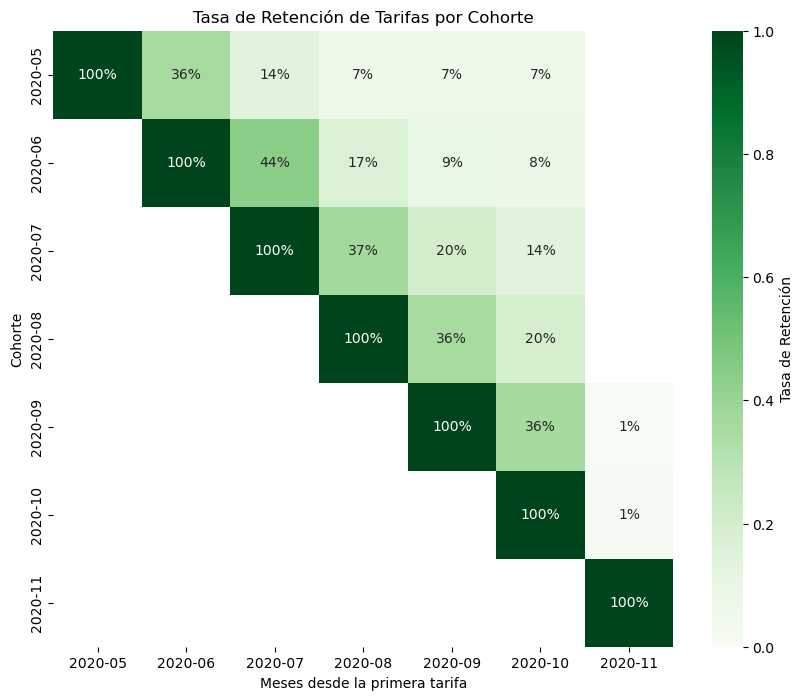

In [46]:
# Visualizar la tasa de retención de tarifas usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Tarifas por Cohorte')
sns.heatmap(data=retention_fees, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='Greens', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera tarifa')
plt.ylabel('Cohorte')
plt.show()


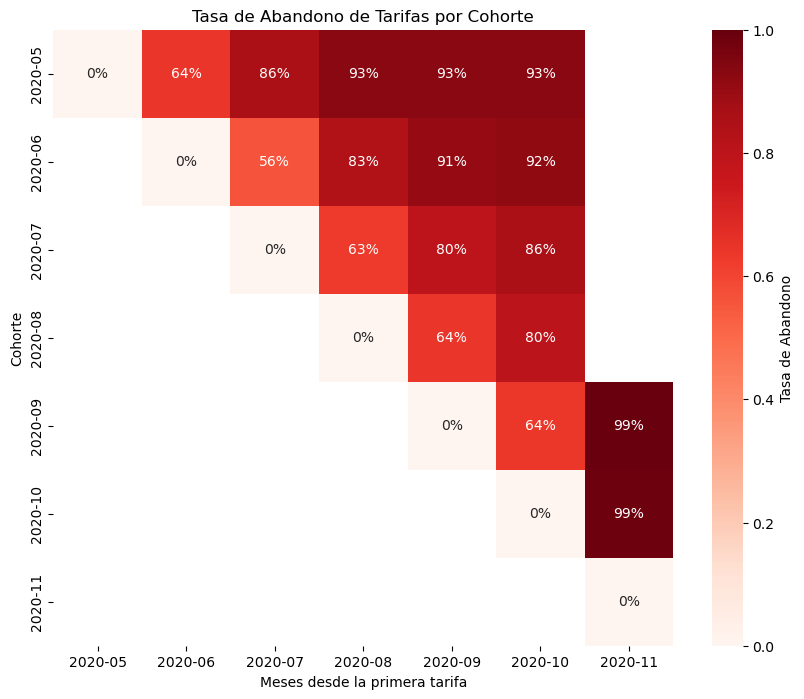

In [47]:
churn_fees = 1 - retention_fees

plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Tarifas por Cohorte')
sns.heatmap(data=churn_fees, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='Reds', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera tarifa')
plt.ylabel('Cohorte')
plt.show()

In [48]:
# Agregar columnas de temporalidad
# Semana y mes de la solicitud
cr['Semana_Mes'] = cr['created_at'].dt.strftime('%U_%B') + '_' + cr['Mes'].dt.strftime('%Y')
# Día y semana de la solicitud
cr['Dia_Semana'] = cr['created_at'].dt.strftime('%A') + '_' + cr['Semana_Mes']
# Hora y dia de la solicitud
cr['Hora_Dia'] = cr['created_at'].dt.hour.astype(str) + '_' + cr['Dia_Semana']
cr.head()

amount                       created_at  user_id  deleted_account_id  \
0   100.0 2019-12-10 19:05:21.596873+00:00    804.0                 NaN   
1   100.0 2019-12-10 19:50:12.347780+00:00    231.0                 NaN   
2   100.0 2019-12-10 19:13:35.825460+00:00    191.0                 NaN   
3    99.0 2019-12-10 19:16:10.880172+00:00    761.0                 NaN   
4   100.0 2020-05-06 09:59:38.877376+00:00   7686.0                 NaN   

  transfer_type            created_at_notz      Mes  Cohorte  \
0       regular 2019-12-10 19:05:21.596873  2019-12  2019-12   
1       regular 2019-12-10 19:50:12.347780  2019-12  2019-12   
2       regular 2019-12-10 19:13:35.825460  2019-12  2019-12   
3       regular 2019-12-10 19:16:10.880172  2019-12  2019-12   
4       regular 2020-05-06 09:59:38.877376  2020-05  2020-05   

         Semana_Mes                Dia_Semana                     Hora_Dia  
0  49_December_2019  Tuesday_49_December_2019  19_Tuesday_49_December_2019  
1  49_December_2019  Tuesday_49_December_2019  19_Tuesday_49_December_2019  
2  49_December_2019  Tuesday_49_December_2019  19_Tuesday_49_December_2019  
3  49_December_2019  Tuesday_49_December_2019  19_Tuesday_49_December_2019  
4       18_May_2020     Wednesday_18_May_2020      9_Wednesday_18_May_2020

In [49]:
# Calcular la cantidad de adelanto de efectivo por cohorte y mes
cohort_revenue = cr.groupby(['Cohorte', 'Mes'])['amount'].sum().reset_index()
cohort_revenue = cohort_revenue.pivot(index='Cohorte', columns='Mes', values='amount')
cohort_revenue

Mes      2019-11  2019-12  2020-01  2020-02  2020-03  2020-04  2020-05  \
Cohorte                                                                  
2019-11      1.0    100.0      NaN      NaN      NaN    100.0     10.0   
2019-12      NaN  21757.0   7163.0   4441.0   6350.0   6350.0   7095.0   
2020-01      NaN      NaN   9864.0   2060.0   1460.0   3500.0   2620.0   
2020-02      NaN      NaN      NaN   8000.0   4640.0   4527.0   4300.0   
2020-03      NaN      NaN      NaN      NaN   7520.0   3950.0   4040.0   
2020-04      NaN      NaN      NaN      NaN      NaN  22336.0  12478.0   
2020-05      NaN      NaN      NaN      NaN      NaN      NaN  38221.0   
2020-06      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-07      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-08      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-09      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-11      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

Mes       2020-06   2020-07  2020-08   2020-09   2020-10  2020-11  
Cohorte                                                            
2019-11       NaN       NaN     10.0       5.0       6.0      NaN  
2019-12    7355.0    6140.0   7090.0    4610.0    6330.0    100.0  
2020-01    2370.0    2710.0   2150.0    1970.0    2300.0    100.0  
2020-02    4055.0    3655.0   4250.0    2555.0    3795.0      NaN  
2020-03    4450.0    3455.0   2840.0    2550.0    2700.0     50.0  
2020-04   12630.0    9500.0   9135.0    6915.0    6250.0      NaN  
2020-05   26168.0   22300.0  18664.0   14400.0   14605.0    300.0  
2020-06  154933.0   83787.0  76441.0   56170.0   53850.0    350.0  
2020-07       NaN  157294.0  70728.0   46555.0   45800.0    500.0  
2020-08       NaN       NaN  70375.0   23870.0   21830.0    675.0  
2020-09       NaN       NaN      NaN  146542.0   48750.0   1475.0  
2020-10       NaN       NaN      NaN       NaN  338830.0   1200.0  
2020-11       NaN       NaN      NaN       NaN       NaN   5810.0

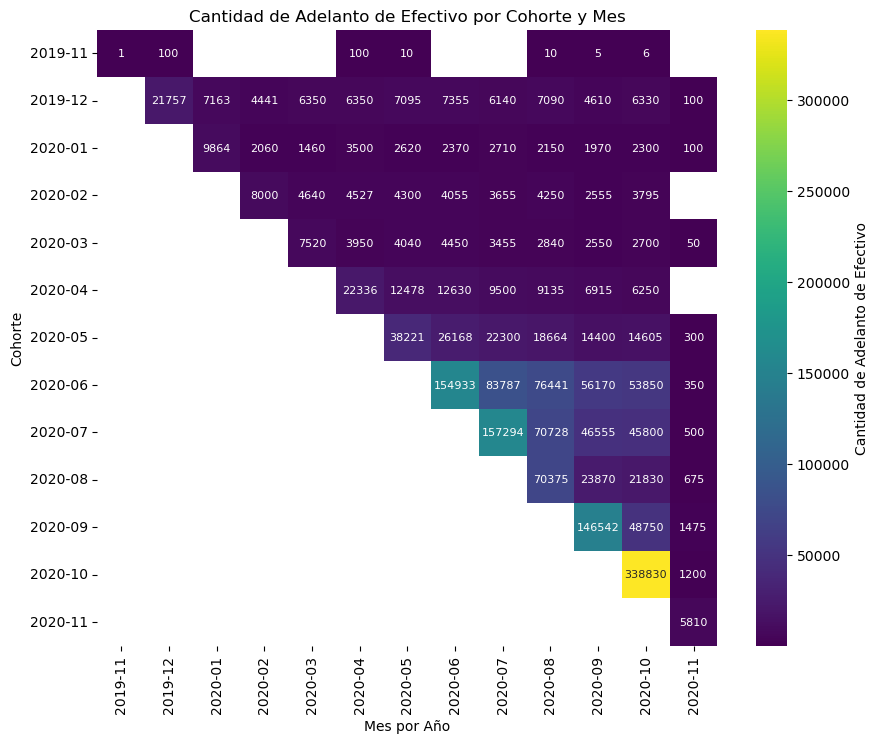

In [50]:
# Graficar la cantidad de adelanto de efectivo por cohorte y mes
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo por Cohorte y Mes')
sns.heatmap(data=cohort_revenue, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Mes por Año')
plt.ylabel('Cohorte')
plt.show()


In [51]:
# Crear DataFrame de cohortes para el mes de '2020-03'
cohort_amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby('user_id')['amount'].sum().reset_index()
cohort_amount_2020_03

user_id  amount
0     161.0   400.0
1     400.0   800.0
2     496.0   650.0
3     680.0   850.0
4     860.0   500.0
..      ...     ...
64   4656.0   500.0
65   4685.0   550.0
66   4715.0   800.0
67   4783.0   500.0
68   4833.0   400.0

[69 rows x 2 columns]

In [54]:
# Ordenar por el monto total para encontrar los 10 usuarios principales
sort_cohort_amount_2020_03 = cohort_amount_2020_03.sort_values(by='amount', ascending=False)
top_10_users = sort_cohort_amount_2020_03.head(10)
top_10_users

user_id  amount
26   3377.0  1305.0
41   4297.0  1200.0
34   3617.0  1000.0
39   3948.0   950.0
32   3557.0   900.0
12   2548.0   900.0
3     680.0   850.0
1     400.0   800.0
66   4715.0   800.0
15   2841.0   750.0

In [55]:
# Filtrar para incluir solo los 10 usuarios seleccionados
amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby(['user_id','Mes'])['amount'].sum().reset_index()
cohort_amount_2020_03_top10 = amount_2020_03[amount_2020_03['user_id'].isin(top_10_users['user_id'])]
cohort_amount_2020_03_top10 = cohort_amount_2020_03_top10.pivot(index='user_id', columns='Mes', values='amount')
cohort_amount_2020_03_top10

Mes      2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  2020-09  \
user_id                                                                  
400.0      100.0    100.0    100.0    100.0    100.0    100.0    100.0   
680.0      200.0    100.0    100.0    100.0    100.0    100.0    100.0   
2548.0     100.0    100.0    100.0    100.0    100.0    200.0      NaN   
2841.0     100.0    100.0    100.0    100.0    100.0    100.0    100.0   
3377.0     300.0    150.0    270.0    200.0    185.0    100.0     50.0   
3557.0     200.0    200.0      NaN    200.0    200.0    100.0      NaN   
3617.0     200.0      NaN    200.0    100.0    200.0    100.0    100.0   
3948.0     200.0    200.0    200.0    100.0      NaN    100.0      NaN   
4297.0     200.0    200.0    200.0    200.0    200.0    100.0    100.0   
4715.0     100.0      NaN    100.0    100.0    200.0    100.0    100.0   

Mes      2020-10  2020-11  
user_id                    
400.0      100.0      NaN  
680.0       50.0      NaN  
2548.0     200.0      NaN  
2841.0      50.0      NaN  
3377.0       NaN     50.0  
3557.0       NaN      NaN  
3617.0     100.0      NaN  
3948.0     150.0      NaN  
4297.0       NaN      NaN  
4715.0     100.0      NaN

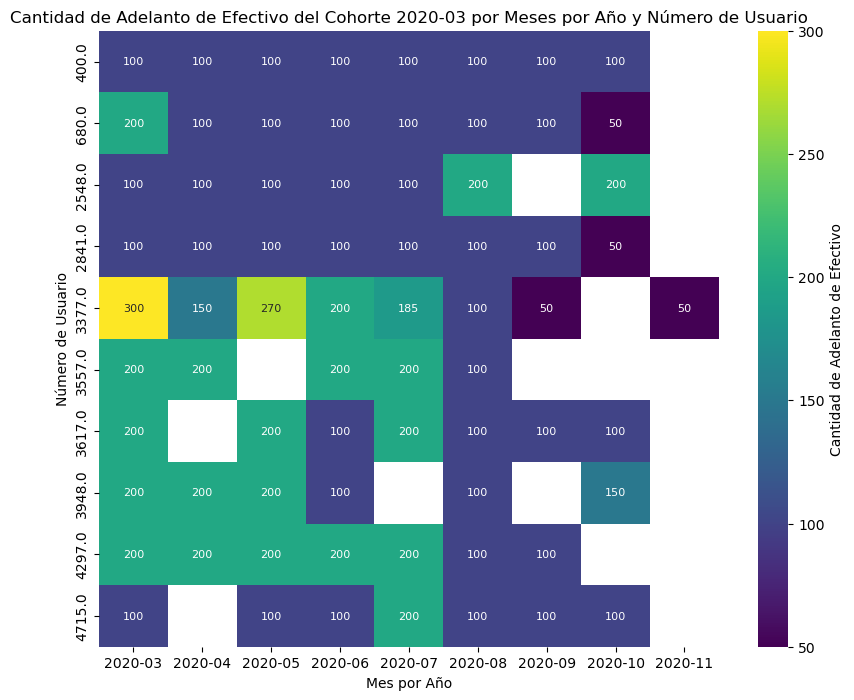

24

In [ ]:
# Graficar la cantidad de adelanto de efectivo de un cohorte por meses y número de usuarios
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Meses por Año y Número de Usuario')
sns.heatmap(data=cohort_amount_2020_03_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Mes por Año')
plt.ylabel('Número de Usuario')
plt.show()


In [57]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y semana
cohort_weekly_amount = cr[cr['Cohorte'] == '2020-03'].groupby(['user_id','Semana_Mes'])['amount'].sum().reset_index()
cohort_weekly_amount

user_id      Semana_Mes  amount
0      161.0   09_March_2020   100.0
1      161.0   14_April_2020   100.0
2      161.0     19_May_2020   100.0
3      161.0    23_June_2020   100.0
4      400.0   10_March_2020   100.0
..       ...             ...     ...
314   4783.0  35_August_2020   100.0
315   4833.0   13_March_2020   100.0
316   4833.0   14_April_2020   100.0
317   4833.0   15_April_2020   100.0
318   4833.0    24_June_2020   100.0

[319 rows x 3 columns]

In [58]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_weekly_amount_top10 = cohort_weekly_amount[cohort_weekly_amount['user_id'].isin(top_10_users['user_id'])]
cohort_weekly_amount_top10 = cohort_weekly_amount_top10.pivot(index='user_id', columns='Semana_Mes', values='amount')
cohort_weekly_amount_top10

Semana_Mes  09_March_2020  10_March_2020  11_March_2020  12_March_2020  \
user_id                                                                  
400.0                 NaN          100.0            NaN            NaN   
680.0               100.0            NaN          100.0            NaN   
2548.0              100.0            NaN            NaN            NaN   
2841.0                NaN            NaN          100.0            NaN   
3377.0                NaN          100.0          100.0          100.0   
3557.0                NaN          200.0            NaN            NaN   
3617.0              200.0            NaN            NaN            NaN   
3948.0                NaN            NaN          100.0          100.0   
4297.0                NaN            NaN          200.0            NaN   
4715.0                NaN            NaN            NaN          100.0   

Semana_Mes  13_April_2020  14_April_2020  15_April_2020  16_April_2020  \
user_id                                                                  
400.0                 NaN          100.0            NaN            NaN   
680.0                 NaN          100.0            NaN            NaN   
2548.0                NaN            NaN          100.0            NaN   
2841.0                NaN            NaN          100.0            NaN   
3377.0               50.0            NaN            NaN          100.0   
3557.0                NaN          200.0            NaN            NaN   
3617.0                NaN            NaN            NaN            NaN   
3948.0              100.0            NaN            NaN          100.0   
4297.0              200.0            NaN            NaN            NaN   
4715.0                NaN            NaN            NaN            NaN   

Semana_Mes  18_May_2020  19_May_2020  ...  33_August_2020  34_August_2020  \
user_id                               ...                                   
400.0             100.0          NaN  ...             NaN             NaN   
680.0               NaN        100.0  ...             NaN             NaN   
2548.0            100.0          NaN  ...             NaN             NaN   
2841.0              NaN        100.0  ...             NaN             NaN   
3377.0            100.0         50.0  ...             NaN             NaN   
3557.0              NaN          NaN  ...           100.0             NaN   
3617.0              NaN          NaN  ...             NaN             NaN   
3948.0              NaN        100.0  ...             NaN           100.0   
4297.0              NaN        200.0  ...             NaN             NaN   
4715.0            100.0          NaN  ...             NaN             NaN   

Semana_Mes  35_August_2020  35_September_2020  36_September_2020  \
user_id                                                            
400.0                  NaN                NaN                NaN   
680.0                  NaN              100.0                NaN   
2548.0               100.0                NaN                NaN   
2841.0                 NaN                NaN                NaN   
3377.0                 NaN               50.0                NaN   
3557.0                 NaN                NaN                NaN   
3617.0                 NaN              100.0                NaN   
3948.0                 NaN                NaN                NaN   
4297.0                 NaN                NaN                NaN   
4715.0                 NaN                NaN              100.0   

Semana_Mes  37_September_2020  40_October_2020  41_October_2020  \
user_id                                                           
400.0                   100.0            100.0              NaN   
680.0                     NaN             50.0              NaN   
2548.0                    NaN            100.0              NaN   
2841.0                  100.0             50.0              NaN   
3377.0                    NaN              NaN              NaN   
3557.0     

In [59]:
# Seleccionar las primeras 10 semanas
cohort_weekly_amount_top10 = cohort_weekly_amount_top10.loc[:,cohort_weekly_amount_top10.columns[:10]]
cohort_weekly_amount_top10

Semana_Mes  09_March_2020  10_March_2020  11_March_2020  12_March_2020  \
user_id                                                                  
400.0                 NaN          100.0            NaN            NaN   
680.0               100.0            NaN          100.0            NaN   
2548.0              100.0            NaN            NaN            NaN   
2841.0                NaN            NaN          100.0            NaN   
3377.0                NaN          100.0          100.0          100.0   
3557.0                NaN          200.0            NaN            NaN   
3617.0              200.0            NaN            NaN            NaN   
3948.0                NaN            NaN          100.0          100.0   
4297.0                NaN            NaN          200.0            NaN   
4715.0                NaN            NaN            NaN          100.0   

Semana_Mes  13_April_2020  14_April_2020  15_April_2020  16_April_2020  \
user_id                                                                  
400.0                 NaN          100.0            NaN            NaN   
680.0                 NaN          100.0            NaN            NaN   
2548.0                NaN            NaN          100.0            NaN   
2841.0                NaN            NaN          100.0            NaN   
3377.0               50.0            NaN            NaN          100.0   
3557.0                NaN          200.0            NaN            NaN   
3617.0                NaN            NaN            NaN            NaN   
3948.0              100.0            NaN            NaN          100.0   
4297.0              200.0            NaN            NaN            NaN   
4715.0                NaN            NaN            NaN            NaN   

Semana_Mes  18_May_2020  19_May_2020  
user_id                               
400.0             100.0          NaN  
680.0               NaN        100.0  
2548.0            100.0          NaN  
2841.0              NaN        100.0  
3377.0            100.0         50.0  
3557.0              NaN          NaN  
3617.0              NaN          NaN  
3948.0              NaN        100.0  
4297.0              NaN        200.0  
4715.0            100.0          NaN

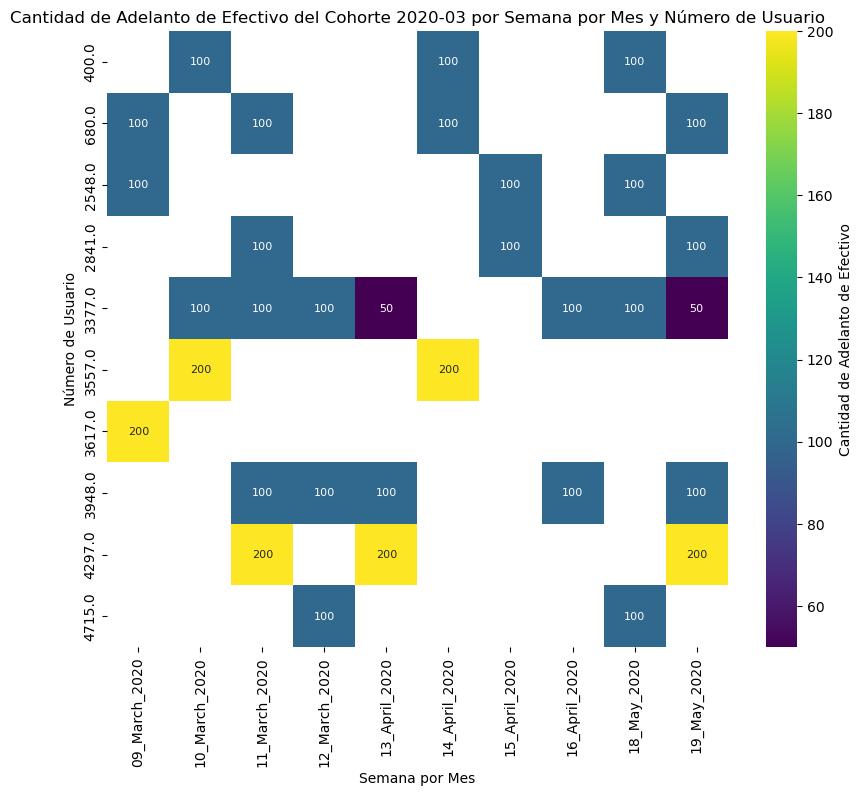

In [60]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por semana
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Semana por Mes y Número de Usuario')
sns.heatmap(data=cohort_weekly_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Semana por Mes')
plt.ylabel('Número de Usuario')
plt.show()



In [61]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y día de la semana
cohort_daily_amount = cr[ (cr['Cohorte'] == '2020-03') & (cr['Semana_Mes'] == '10_March_2020') ].groupby(['user_id', 'Dia_Semana'])['amount'].sum().reset_index()
cohort_daily_amount

user_id               Dia_Semana  amount
0     400.0     Monday_10_March_2020   100.0
1    1280.0     Monday_10_March_2020   100.0
2    2197.0     Monday_10_March_2020   100.0
3    3338.0    Tuesday_10_March_2020   100.0
4    3377.0     Monday_10_March_2020   100.0
5    3391.0    Tuesday_10_March_2020   100.0
6    3549.0     Sunday_10_March_2020   100.0
7    3557.0  Wednesday_10_March_2020   200.0
8    3628.0   Thursday_10_March_2020   100.0
9    4314.0     Sunday_10_March_2020   100.0
10   4376.0   Saturday_10_March_2020   100.0
11   4474.0     Monday_10_March_2020   100.0
12   4476.0  Wednesday_10_March_2020   100.0
13   4505.0  Wednesday_10_March_2020   100.0
14   4518.0     Friday_10_March_2020    10.0
15   4546.0   Thursday_10_March_2020   100.0
16   4549.0   Saturday_10_March_2020   100.0
17   4580.0  Wednesday_10_March_2020   100.0
18   4582.0  Wednesday_10_March_2020   100.0
19   4595.0   Saturday_10_March_2020   100.0
20   4607.0   Thursday_10_March_2020    50.0

In [62]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_daily_amount_top10 = cohort_daily_amount[cohort_daily_amount['user_id'].isin(top_10_users['user_id'])]
cohort_daily_amount_top10 = cohort_daily_amount_top10.pivot(index='user_id',columns='Dia_Semana', values='amount')
cohort_daily_amount_top10

Dia_Semana  Monday_10_March_2020  Wednesday_10_March_2020
user_id                                                  
400.0                      100.0                      NaN
3377.0                     100.0                      NaN
3557.0                       NaN                    200.0

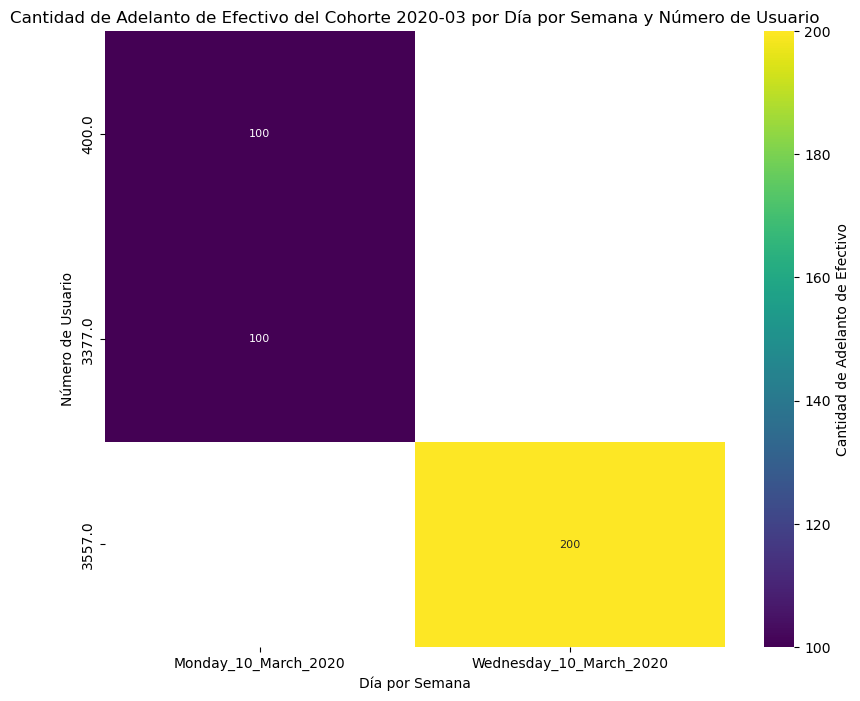

In [63]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por día de la semana
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Día por Semana y Número de Usuario')
sns.heatmap(data=cohort_daily_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Día por Semana')
plt.ylabel('Número de Usuario')
plt.show()



In [66]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y hora
cohort_hourly_amount = cr[(cr['Cohorte'] == '2020-03') & 
                          (cr['Semana_Mes'] == '10_March_2020') & 
                          (cr['Dia_Semana'] == 'Monday_10_March_2020')].groupby(['user_id', 'Hora_Dia'])['amount'].sum().reset_index()
cohort_hourly_amount

user_id                 Hora_Dia  amount
0    400.0   7_Monday_10_March_2020   100.0
1   1280.0  19_Monday_10_March_2020   100.0
2   2197.0  15_Monday_10_March_2020   100.0
3   3377.0  13_Monday_10_March_2020   100.0
4   4474.0  10_Monday_10_March_2020   100.0

In [67]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_hourly_amount_top10 = cohort_hourly_amount[cohort_hourly_amount['user_id'].isin(top_10_users['user_id'])]
cohort_hourly_amount_top10 = cohort_hourly_amount_top10.pivot(index='user_id',columns='Hora_Dia', values='amount')
cohort_hourly_amount_top10

Hora_Dia  13_Monday_10_March_2020  7_Monday_10_March_2020
user_id                                                  
400.0                         NaN                   100.0
3377.0                      100.0                     NaN

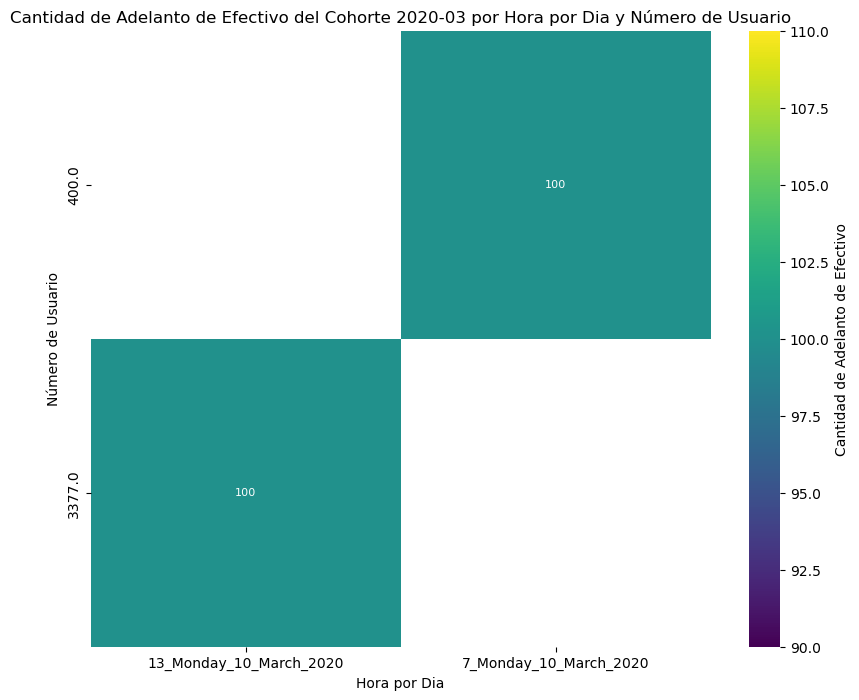

In [68]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por hora
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Hora por Dia y Número de Usuario')
sns.heatmap(data=cohort_hourly_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Hora por Dia')
plt.ylabel('Número de Usuario')
plt.show()

In [70]:
# Importando la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importando NumPy para operaciones numéricas y manipulación de arreglos
import numpy as np
# Importando Seaborn para visualización de datos estadísticos (opcional, pero puede complementar a Plotly)
import seaborn as sns
# Importando Plotly Express para visualizaciones interactivas de alto nivel y fáciles de usar
import plotly.express as px
# Importando matplotlib.pyplot para crear gráficos y visualizaciones

import matplotlib.pyplot as plt
# Importando Plotly Graph Objects para un control más detallado sobre las visualizaciones
import plotly.graph_objects as go
# Importando itertools para generar combinaciones de columnas
import itertools
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
cash_request=pd.read_csv('./data/extract - cash request - data analyst.csv')
fees=pd.read_csv('./data/extract - fees - data analyst - .csv')

fig1 = px.imshow(cash_request.isnull(),
color_continuous_scale=['black', 'red'],
labels=dict(color="NaN"),
title="Mapa de calor para cash_request")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()
